In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def initial_probability_vector(d):
    return np.full(d, 0.5)

In [10]:
def binary_random(p):
    sample=np.random.rand()
    if sample < p:
        return 1
    return 0

In [60]:
def random_individual(p_vec):
    d = p_vec.size
    res=[]
    for k in range(d):
        res.append(binary_random(p_vec[k]))
    return np.array(res)

In [62]:
def random_population(p_vec, N):
    res=[]
    for k in range(N):
        res.append(random_individual(p_vec))
    return np.array(res)
random_population(np.array([0.5, 0.5, 0.5, 0.5]), 4)

array([[1, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 1]])

In [13]:
def find_best(population, evaluation_result):
    return population[np.argmax(evaluation_result)]

In [21]:
def select_sample_from_population(population, evaluation_results, M):
    best_indices=evaluation_results.argsort()[::-1][:M]
    return population[best_indices]
#print(select_sample_from_population(np.array([[1, 2], [3, 4], [5, 6], [7, 8]]), np.array([3, 7, 11, 15]), 2))

In [49]:
def CGA(iters, d, F, theta):
    p_vec=initial_probability_vector(d)
    p1=random_individual(p_vec)
    p2=random_individual(p_vec)
    results=F(np.array([p1, p2]))
    res1, res2 = results[0], results[1]
    best_evaluation_results=[]
    mean_evaluation_results=[]
    worst_evaluation_results=[]
    solutions=[]
    for i in range(iters):
        better_ind=p1 if res1 > res2 else p2
        worse_ind=p2 if res1 > res2 else p1
        best_evaluation_results.append(max(res1, res2))
        mean_evaluation_results.append((res1 + res2)/2)
        worst_evaluation_results.append(min(res1, res2))
        solutions.append(better_ind)
        for k in range(d):
            if better_ind[k] == 1 and worse_ind[k] == 0:
                p_vec[k] += theta
            if better_ind[k] == 0 and worse_ind[k] == 1:
                p_vec[k] -= theta
        p1=random_individual(p_vec)
        p2=random_individual(p_vec)
        results=F(np.array([p1, p2]))
        res1, res2 = results[0], results[1]
    return find_best(solutions, F(solutions)), best_evaluation_results, mean_evaluation_results, worst_evaluation_results

In [25]:
def PBIL(iters, d, F, N, theta1, theta2, theta3):
    p_vec=initial_probability_vector(d)
    population=random_population(p_vec, N)
    evaluation_result=F(population)
    best_evaluation_results=[]
    mean_evaluation_results=[]
    worst_evaluation_results=[]
    solutions=[]
    for i in range(iters):
        best_individual=find_best(population, evaluation_result)
        best_evaluation_results.append(np.max(evaluation_result))
        mean_evaluation_results.append(np.mean(evaluation_result))
        worst_evaluation_results.append(np.min(evaluation_result))
        solutions.append(best_individual)
        for k in range(d):
            p_vec[k] = p_vec[k] * (1 - theta1) + best_individual[k] * theta1
        for k in range(d):
            sample=np.random.rand()
            if sample < theta2:
                p_vec[k] = p_vec[k] * (1 - theta3) + binary_random(0.5) * theta3
        population=random_population(p_vec, N)
        evaluation_result=F(population)
    return find_best(solutions, F(solutions)), best_evaluation_results, mean_evaluation_results, worst_evaluation_results

In [26]:
def UMDA(iters, d, F, N, M):
    p_vec=initial_probability_vector(d)
    population=random_population(p_vec, N)
    evaluation_result=F(population)
    best_evaluation_results=[]
    mean_evaluation_results=[]
    worst_evaluation_results=[]
    solutions=[]
    for i in range(iters):
        best_individual=find_best(population, evaluation_result)
        best_evaluation_results.append(np.max(evaluation_result))
        mean_evaluation_results.append(np.mean(evaluation_result))
        worst_evaluation_results.append(np.min(evaluation_result))
        solutions.append(best_individual)
        sample = select_sample_from_population(population, evaluation_result, M)
        for k in range(d):
            p_vec[k] = np.sum(sample[:, k])
        population=random_population(p_vec, N)
        evaluation_result=F(population)
    return find_best(solutions, F(solutions)), best_evaluation_results, mean_evaluation_results, worst_evaluation_results

In [27]:
def plot_chart(P):
    plt.figure(figsize=(20, 7))
    plt.plot(P[1], label="Best results")
    plt.plot(P[2], label="Mean results")
    plt.plot(P[3], label="Worst results")
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.show()

## OneMax

In [63]:
def one_max(population):
    return np.sum(population, 1)

CGA:
For args : 500, 20, one_max, 0.15


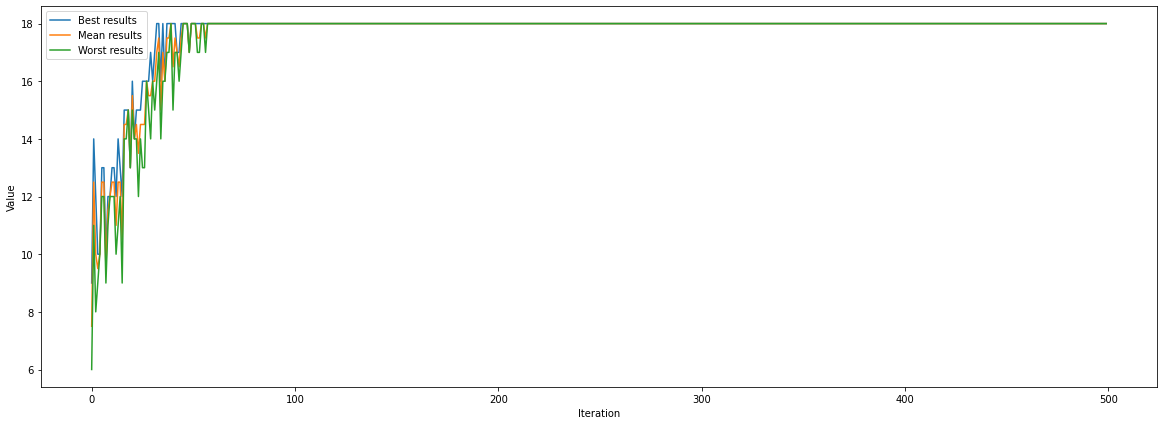

[1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1]
For args : 700, 10, one_max, 0.09


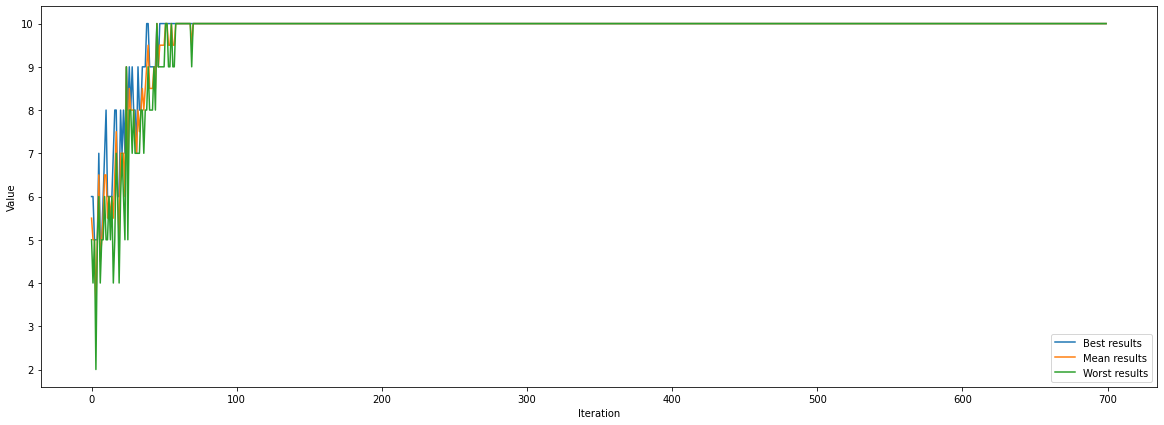

[1 1 1 1 1 1 1 1 1 1]
For args : 300, 50, one_max, 0.05


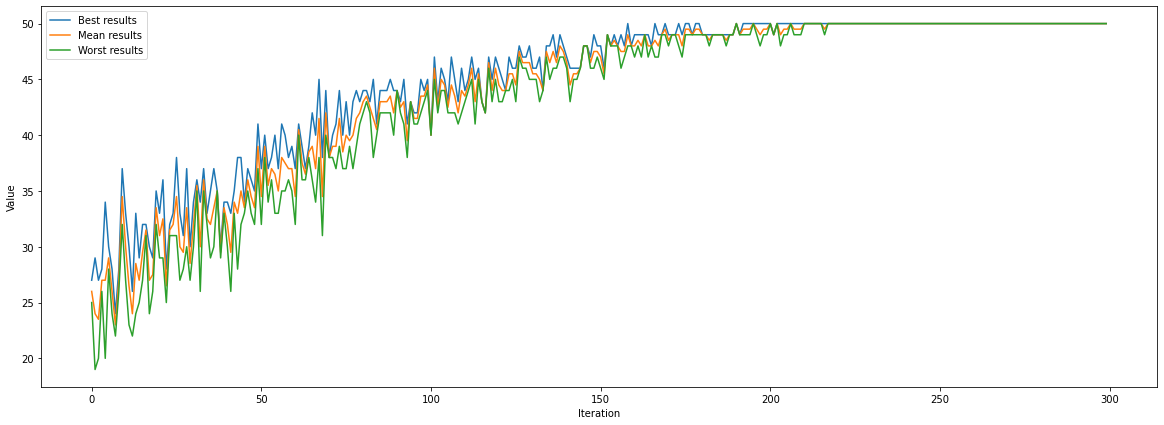

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [64]:
print("CGA:")
print("For args : 500, 20, one_max, 0.15")
P=CGA(500, 20, one_max, 0.15)
plot_chart(P)
print(P[0])
print("For args : 700, 10, one_max, 0.09")
P=CGA(700, 10, one_max, 0.09)
plot_chart(P)
print(P[0])
print("For args : 300, 50, one_max, 0.05")
P=CGA(300, 50, one_max, 0.05)
plot_chart(P)
print(P[0])

PBIL:
For args : 500, 20, one_max, 50, 0.1, 0.2, 0.15


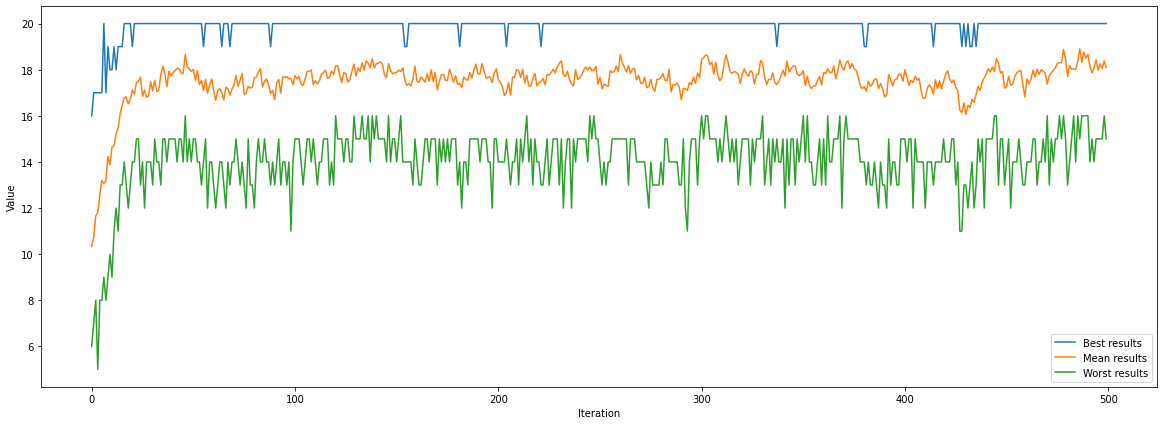

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
For args : 700, 10, one_max, 100, 0.07, 0.03, 0.04


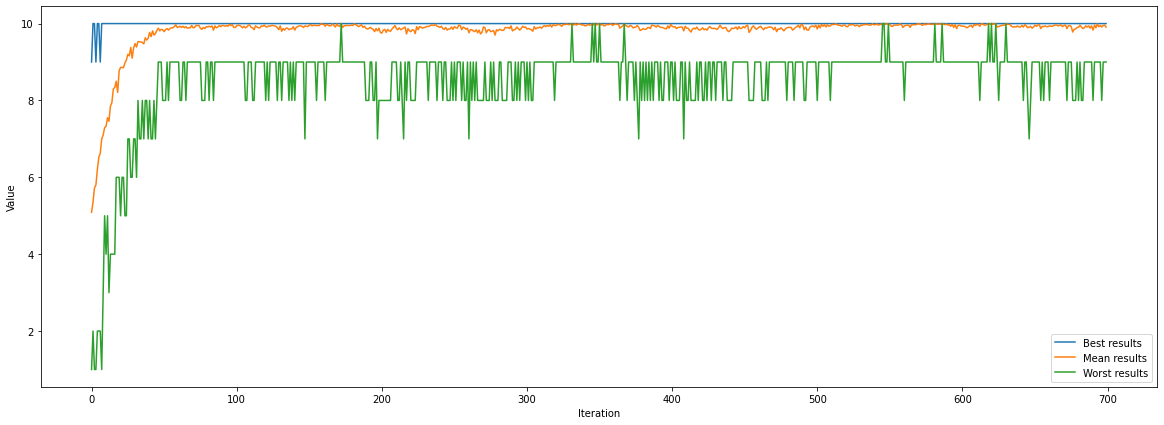

[1 1 1 1 1 1 1 1 1 1]
For args : 300, 50, one_max, 20, 0.15, 0.13, 0.01


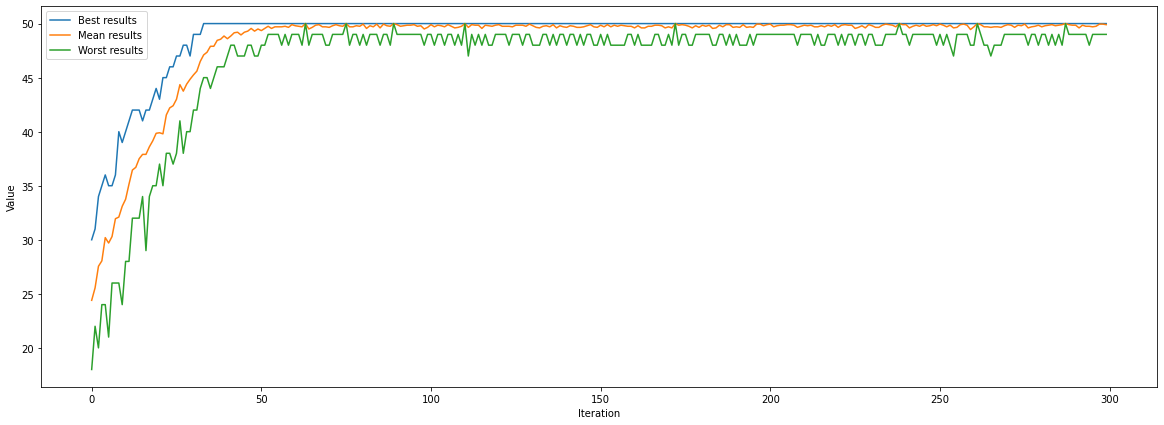

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [65]:
print("PBIL:")
print("For args : 500, 20, one_max, 50, 0.1, 0.2, 0.15")
P=PBIL(500, 20, one_max, 50, 0.1, 0.2, 0.15)
plot_chart(P)
print(P[0])
print("For args : 700, 10, one_max, 100, 0.07, 0.03, 0.04")
P=PBIL(700, 10, one_max, 100, 0.07, 0.03, 0.04)
plot_chart(P)
print(P[0])
print("For args : 300, 50, one_max, 20, 0.15, 0.13, 0.01")
P=PBIL(300, 50, one_max, 20, 0.15, 0.13, 0.01)
plot_chart(P)
print(P[0])

UMDA:
For args : 500, 20, one_max, 50, 25


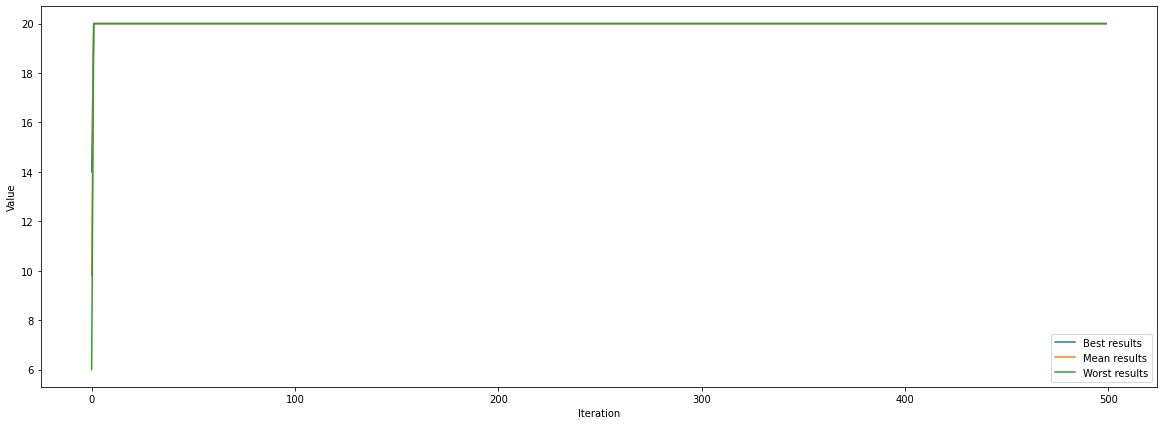

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
For args : 700, 10, one_max, 100, 30


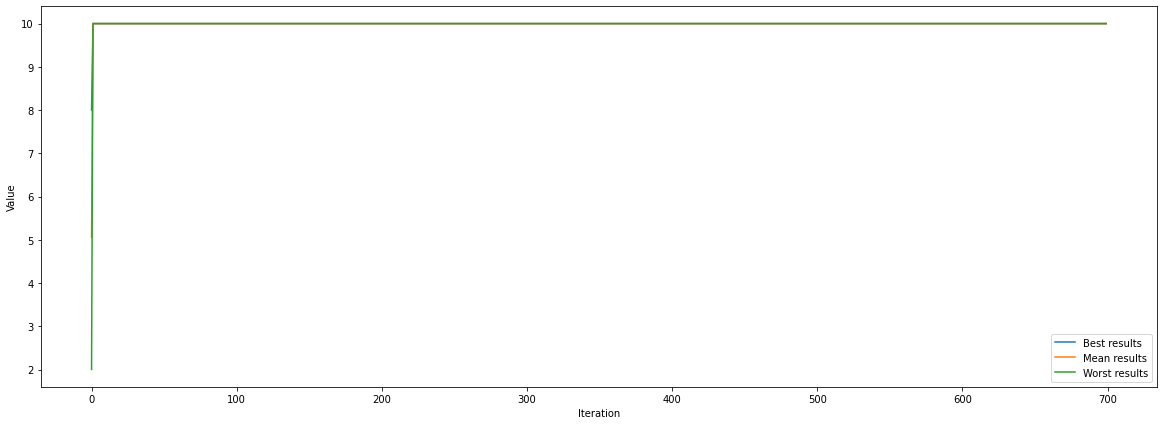

[1 1 1 1 1 1 1 1 1 1]
For args : 300, 50, one_max, 20, 15


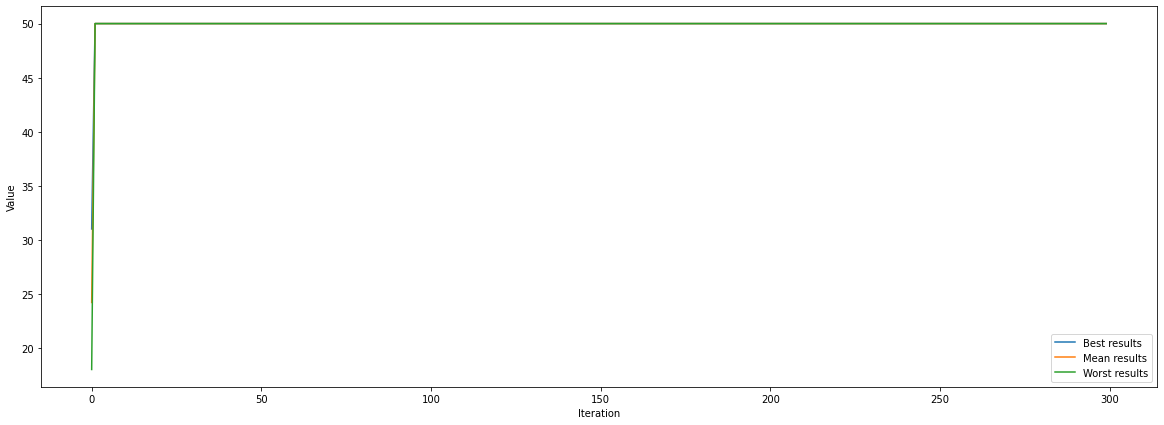

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [66]:
print("UMDA:")
print("For args : 500, 20, one_max, 50, 25")
P=UMDA(500, 20, one_max, 50, 25)
plot_chart(P)
print(P[0])
print("For args : 700, 10, one_max, 100, 30")
P=UMDA(700, 10, one_max, 100, 30)
plot_chart(P)
print(P[0])
print("For args : 300, 50, one_max, 20, 15")
P=UMDA(300, 50, one_max, 20, 15)
plot_chart(P)
print(P[0])

## DeceptiveOneMax

In [67]:
def deceptive_one_max(population): 
    res = []
    for i in range(len(population)):
        if np.any(population[i]):
            res.append(np.sum(population[i]))
        else:
            res.append(population[i].size + 1)
    return np.array(res)

CGA:
For args : 500, 20, deceptive_one_max, 0.15


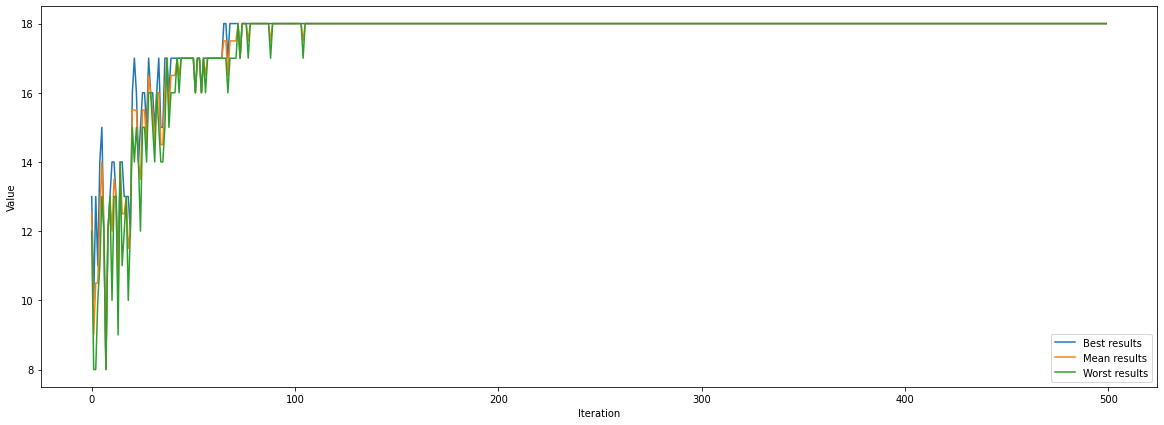

[1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1]
For args : 700, 10, deceptive_one_max, 0.09


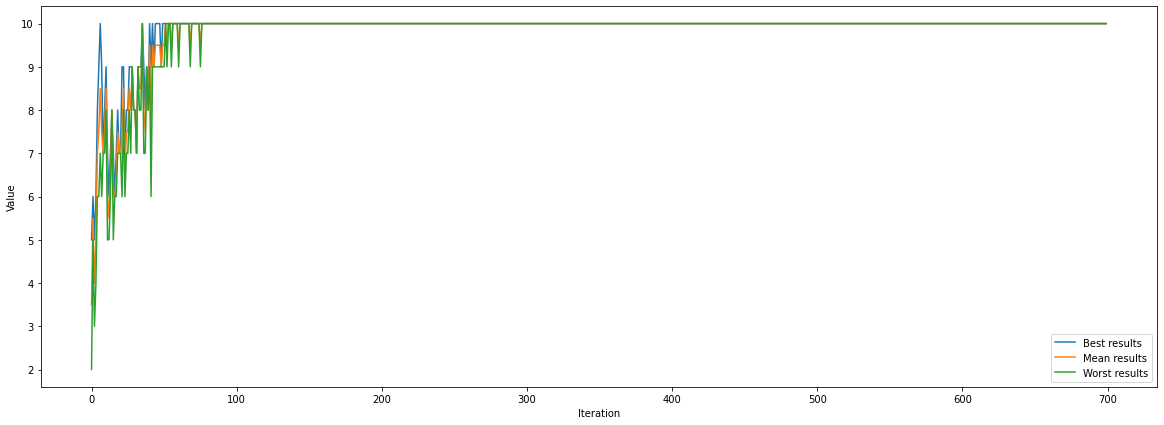

[1 1 1 1 1 1 1 1 1 1]
For args : 300, 50, deceptive_one_max, 0.05


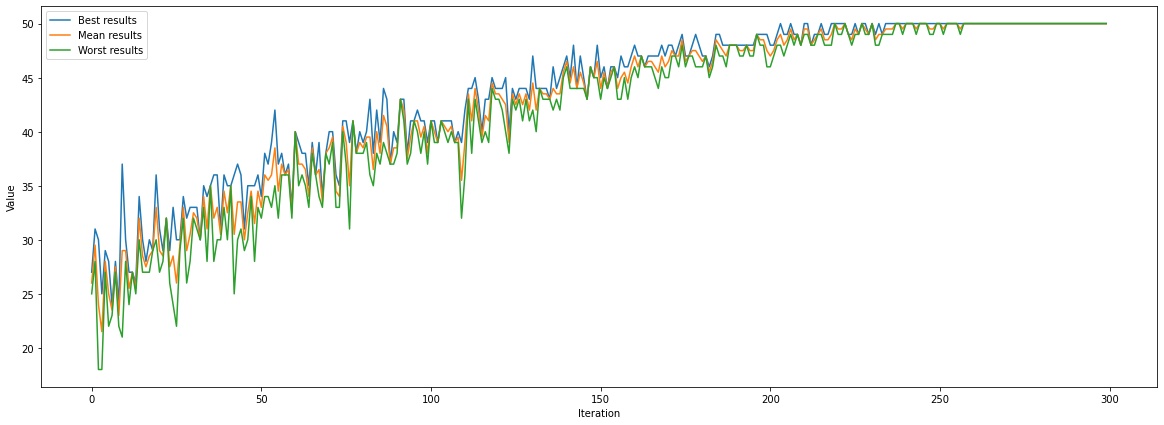

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [68]:
print("CGA:")
print("For args : 500, 20, deceptive_one_max, 0.15")
P=CGA(500, 20, deceptive_one_max, 0.15)
plot_chart(P)
print(P[0])
print("For args : 700, 10, deceptive_one_max, 0.09")
P=CGA(700, 10, deceptive_one_max, 0.09)
plot_chart(P)
print(P[0])
print("For args : 300, 50, deceptive_one_max, 0.05")
P=CGA(300, 50, deceptive_one_max, 0.05)
plot_chart(P)
print(P[0])

PBIL:
For args : 500, 20, deceptive_one_max, 50, 0.1, 0.2, 0.15


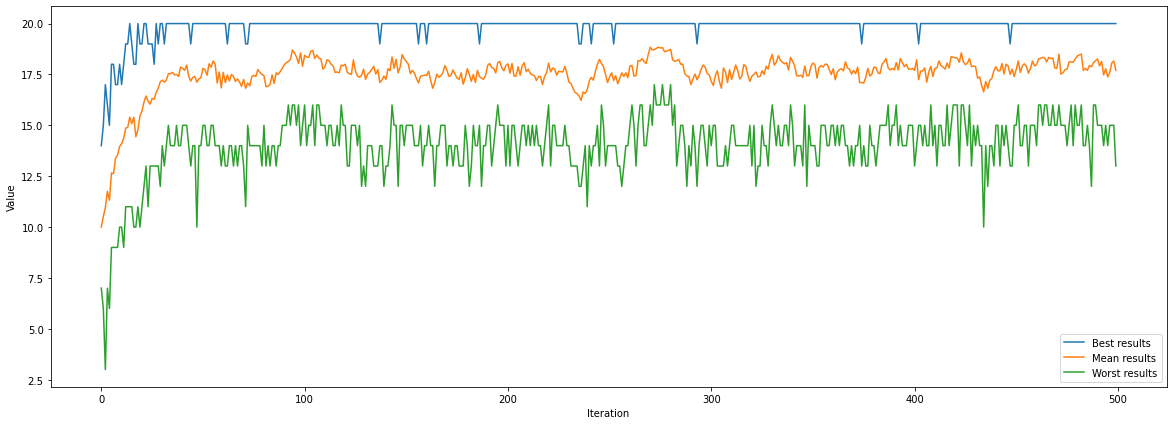

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
For args : 700, 10, deceptive_one_max, 100, 0.07, 0.03, 0.04


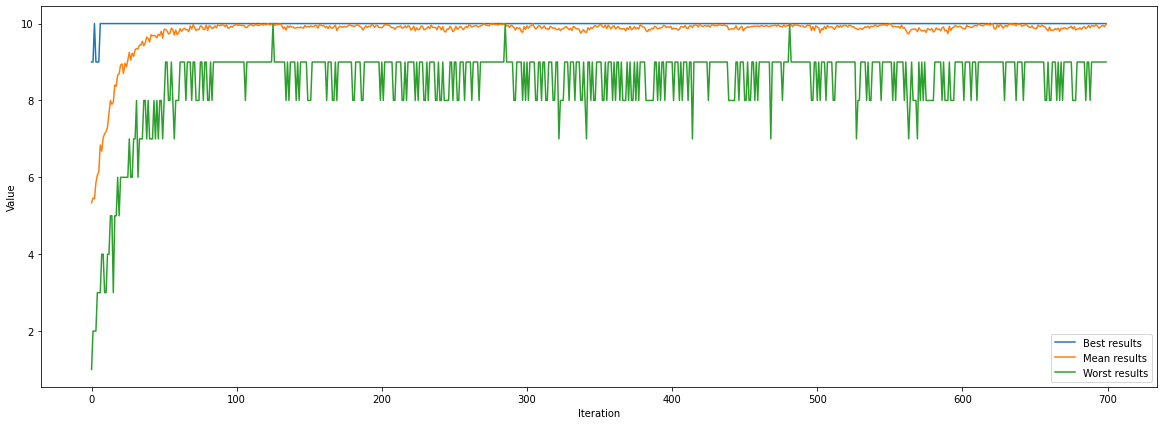

[1 1 1 1 1 1 1 1 1 1]
For args : 300, 50, deceptive_one_max, 20, 0.15, 0.13, 0.01


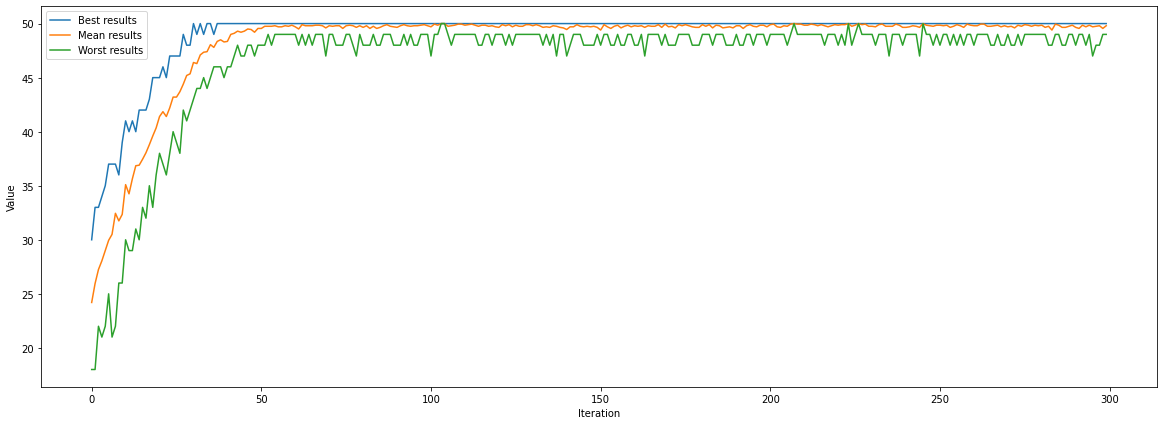

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [69]:
print("PBIL:")
print("For args : 500, 20, deceptive_one_max, 50, 0.1, 0.2, 0.15")
P=PBIL(500, 20, deceptive_one_max, 50, 0.1, 0.2, 0.15)
plot_chart(P)
print(P[0])
print("For args : 700, 10, deceptive_one_max, 100, 0.07, 0.03, 0.04")
P=PBIL(700, 10, deceptive_one_max, 100, 0.07, 0.03, 0.04)
plot_chart(P)
print(P[0])
print("For args : 300, 50, deceptive_one_max, 20, 0.15, 0.13, 0.01")
P=PBIL(300, 50, deceptive_one_max, 20, 0.15, 0.13, 0.01)
plot_chart(P)
print(P[0])

UMDA:
For args : 500, 20, deceptive_one_max, 50, 25


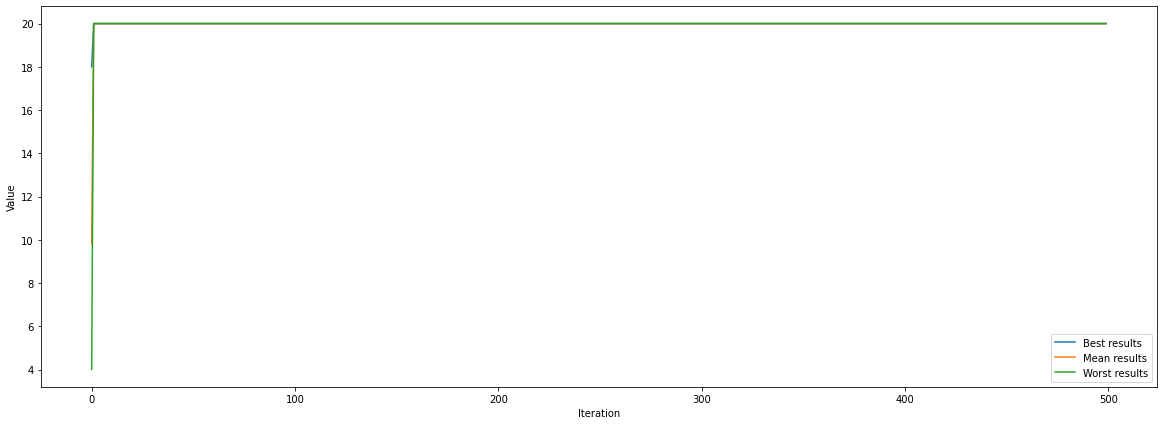

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
For args : 700, 10, deceptive_one_max, 100, 30


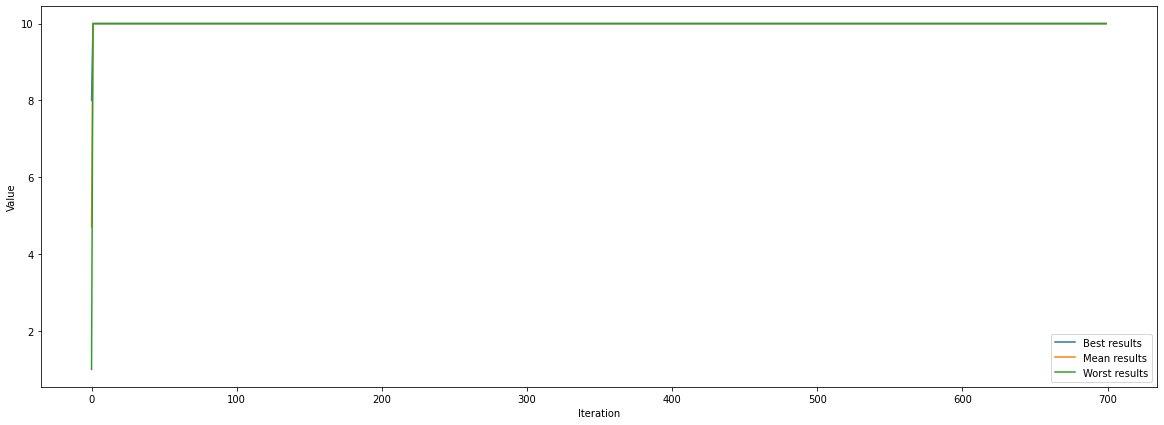

[1 1 1 1 1 1 1 1 1 1]
For args : 300, 50, deceptive_one_max, 20, 15


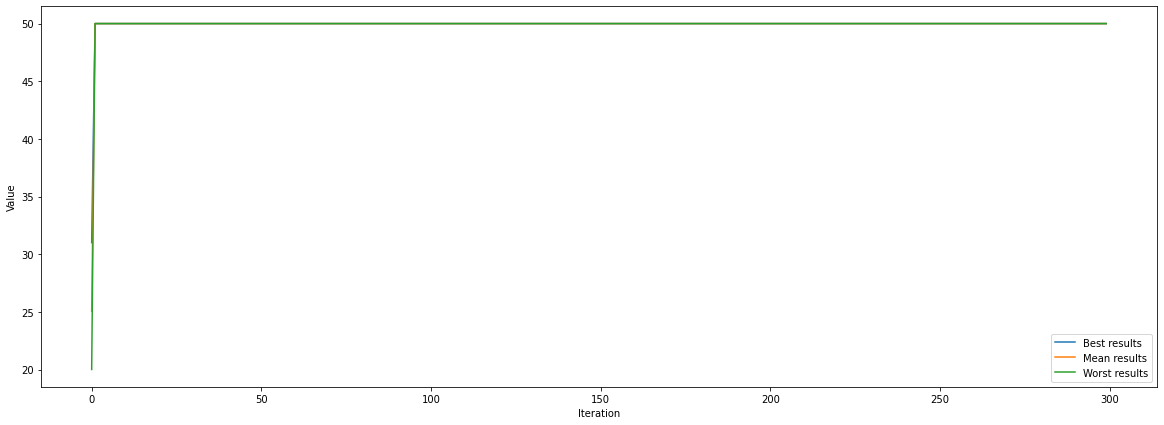

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [70]:
print("UMDA:")
print("For args : 500, 20, deceptive_one_max, 50, 25")
P=UMDA(500, 20, deceptive_one_max, 50, 25)
plot_chart(P)
print(P[0])
print("For args : 700, 10, deceptive_one_max, 100, 30")
P=UMDA(700, 10, deceptive_one_max, 100, 30)
plot_chart(P)
print(P[0])
print("For args : 300, 50, deceptive_one_max, 20, 15")
P=UMDA(300, 50, deceptive_one_max, 20, 15)
plot_chart(P)
print(P[0])

## KDeceptiveOneMax

In [71]:
k=5
def k_deceptive_one_max(population): 
    res = []
    for i in range(len(population)):
        ith_val=0
        for part in range(0, len(population[i]) // k):
            if np.any(population[i][part * k : part * k + k]):
                ith_val += np.sum(population[i][part * k : part * k + k]) 
            else:
                ith_val += k + 1
        res.append(ith_val)
    return np.array(res)

CGA:
For args : 500, 20, k_deceptive_one_max, 0.15


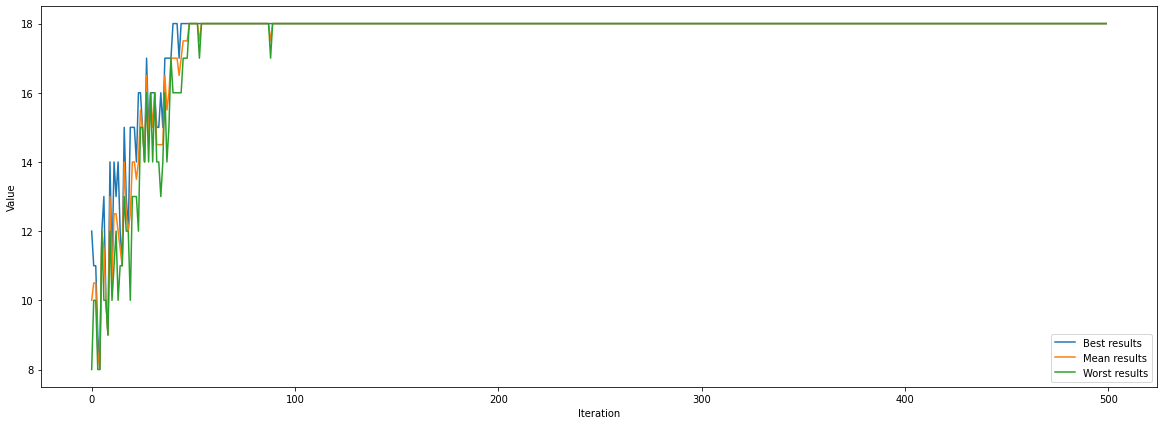

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
For args : 700, 10, k_deceptive_one_max, 0.09


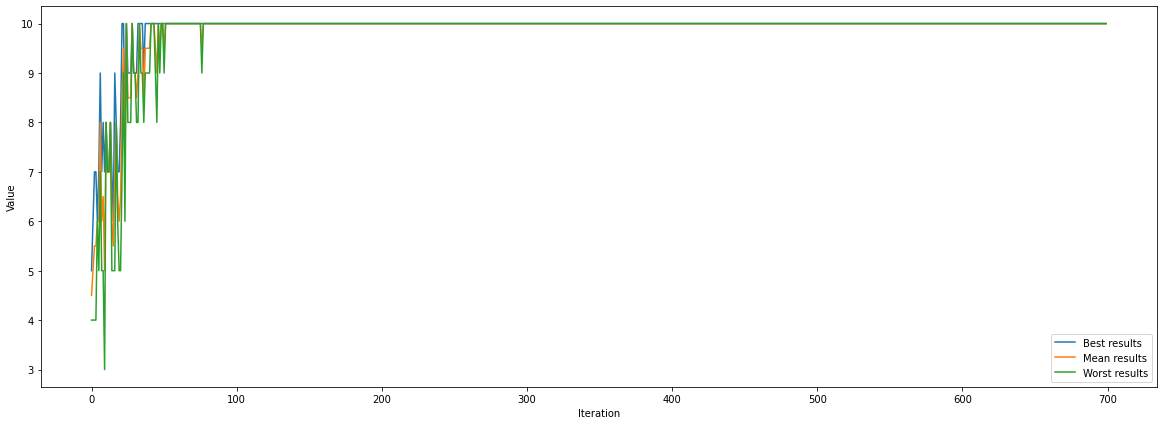

[1 1 1 1 1 1 1 1 1 1]
For args : 300, 50, k_deceptive_one_max, 0.05


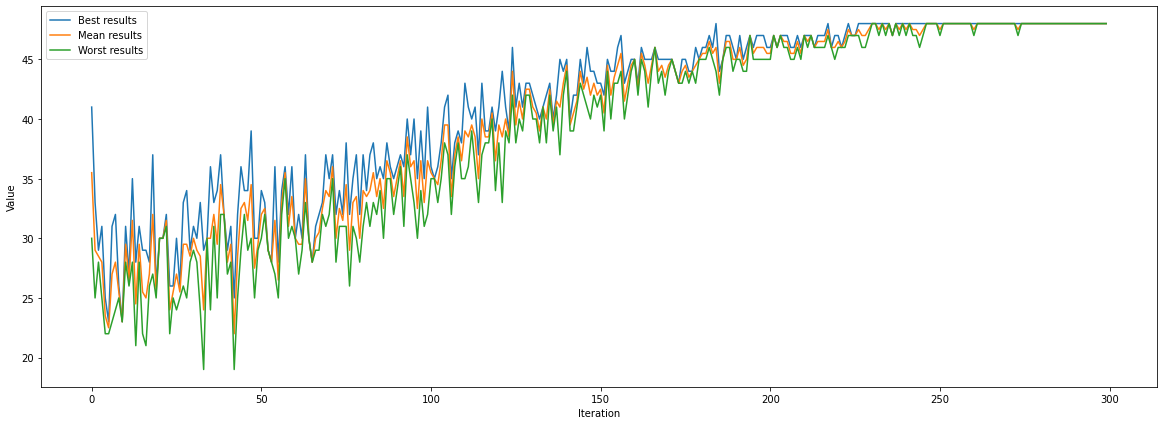

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1]


In [72]:
print("CGA:")
print("For args : 500, 20, k_deceptive_one_max, 0.15")
P=CGA(500, 20, k_deceptive_one_max, 0.15)
plot_chart(P)
print(P[0])
print("For args : 700, 10, k_deceptive_one_max, 0.09")
P=CGA(700, 10, k_deceptive_one_max, 0.09)
plot_chart(P)
print(P[0])
print("For args : 300, 50, k_deceptive_one_max, 0.05")
P=CGA(300, 50, k_deceptive_one_max, 0.05)
plot_chart(P)
print(P[0])

PBIL:
For args : 500, 20, k_deceptive_one_max, 50, 0.1, 0.2, 0.15


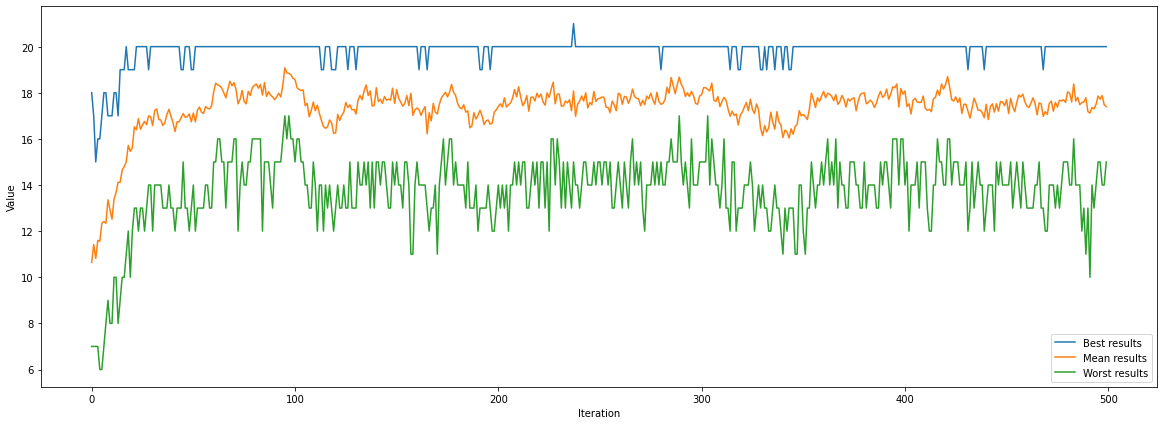

[1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
For args : 700, 10, k_deceptive_one_max, 100, 0.07, 0.03, 0.04


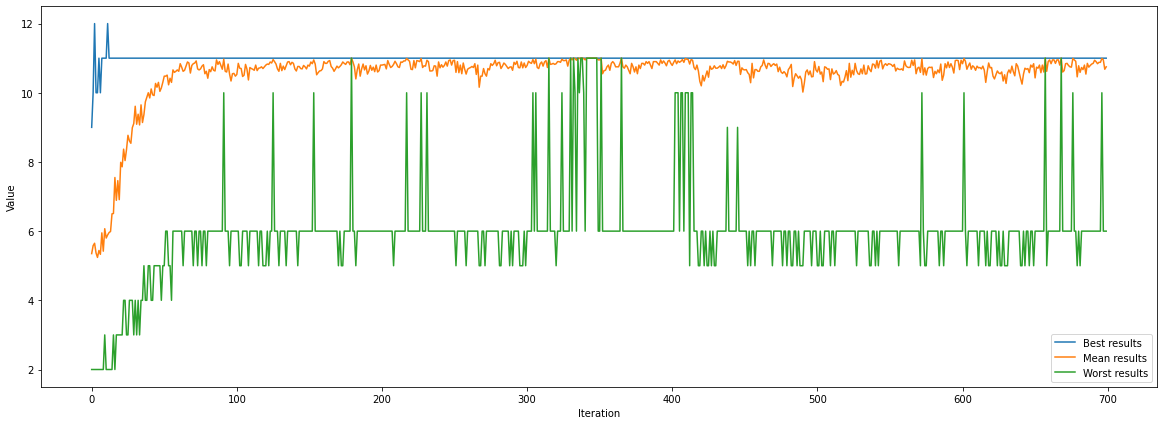

[0 0 0 0 0 0 0 0 0 0]
For args : 300, 50, k_deceptive_one_max, 20, 0.15, 0.13, 0.01


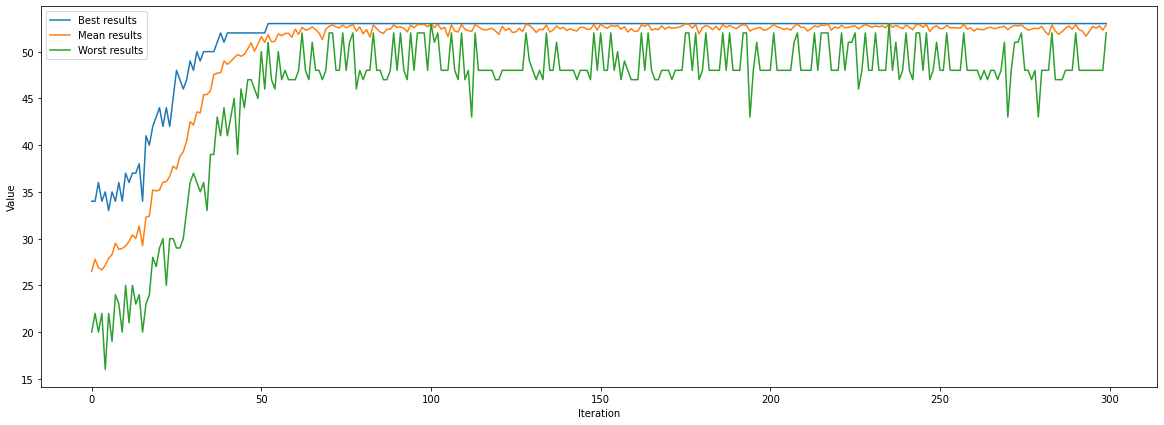

[1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [73]:
print("PBIL:")
print("For args : 500, 20, k_deceptive_one_max, 50, 0.1, 0.2, 0.15")
P=PBIL(500, 20, k_deceptive_one_max, 50, 0.1, 0.2, 0.15)
plot_chart(P)
print(P[0])
print("For args : 700, 10, k_deceptive_one_max, 100, 0.07, 0.03, 0.04")
P=PBIL(700, 10, k_deceptive_one_max, 100, 0.07, 0.03, 0.04)
plot_chart(P)
print(P[0])
print("For args : 300, 50, k_deceptive_one_max, 20, 0.15, 0.13, 0.01")
P=PBIL(300, 50, k_deceptive_one_max, 20, 0.15, 0.13, 0.01)
plot_chart(P)
print(P[0])

UMDA:
For args : 500, 20, k_deceptive_one_max, 50, 25


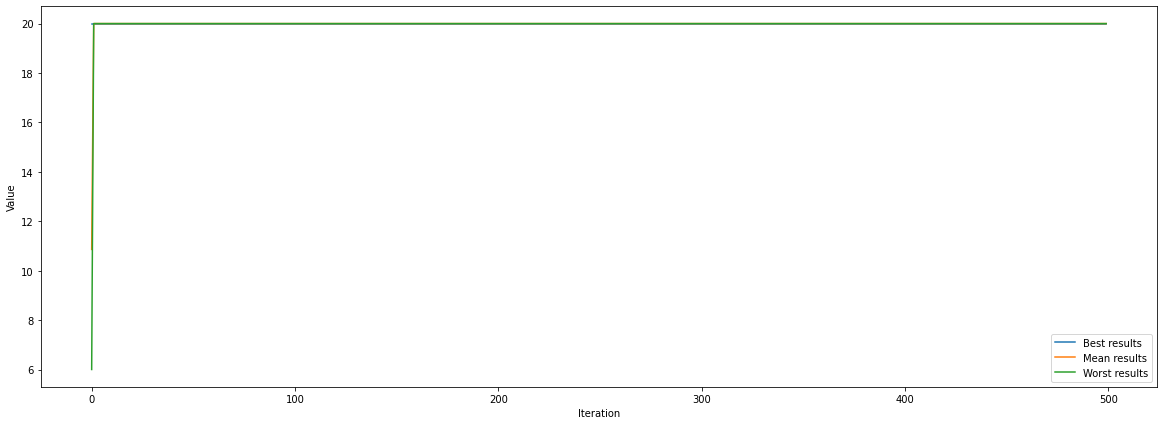

[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
For args : 700, 10, k_deceptive_one_max, 100, 30


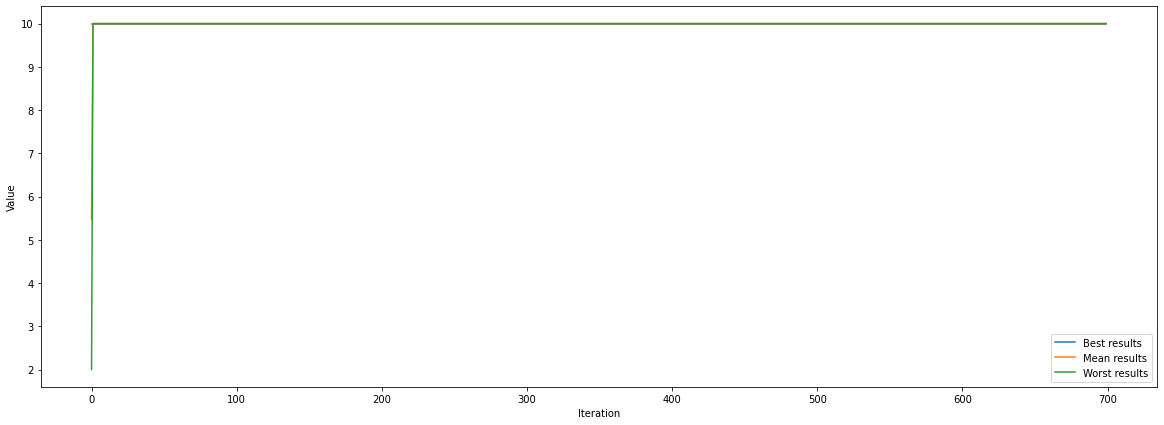

[0 0 0 0 0 1 1 1 1 0]
For args : 300, 50, k_deceptive_one_max, 20, 15


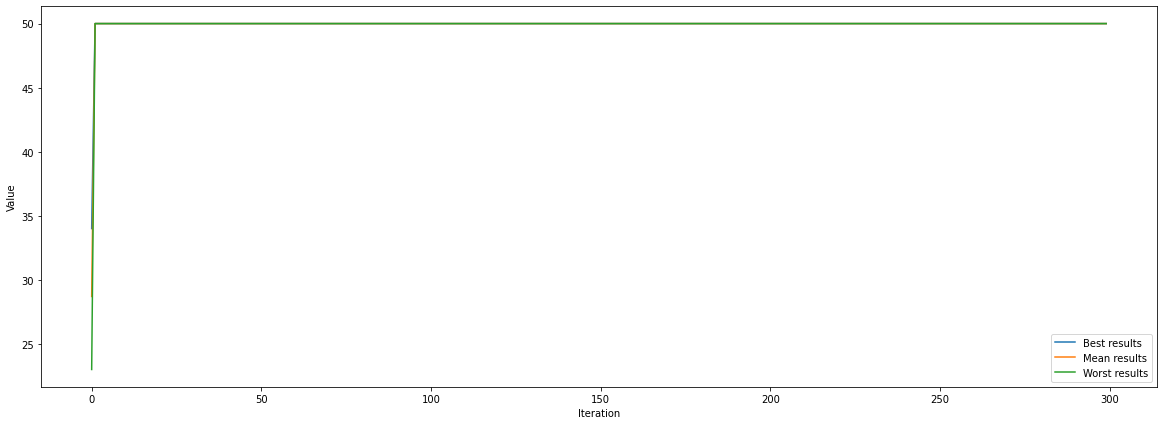

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [74]:
print("UMDA:")
print("For args : 500, 20, k_deceptive_one_max, 50, 25")
P=UMDA(500, 20, k_deceptive_one_max, 50, 25)
plot_chart(P)
print(P[0])
print("For args : 700, 10, k_deceptive_one_max, 100, 30")
P=UMDA(700, 10, k_deceptive_one_max, 100, 30)
plot_chart(P)
print(P[0])
print("For args : 300, 50, k_deceptive_one_max, 20, 15")
P=UMDA(300, 50, k_deceptive_one_max, 20, 15)
plot_chart(P)
print(P[0])